In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('patient_data.csv')

In [3]:
df.head()

Patient_No  Time_seconds  Heart_rate_bpm  Breadth_rate_bpm  SpO2_percent  \
0           1             0            94.0              21.0          97.0   
1           2             1            94.0              25.0          97.0   
2           3             2           101.0              25.0          93.0   
3           4             3            55.0              11.0         100.0   
4           5             4            93.0              26.0          95.0   

   Temp_celcius    Output  
0          36.2    Normal  
1          36.2    Normal  
2          38.0  Abnormal  
3          35.0  Abnormal  
4          37.0    Normal

In [14]:
df.describe()

Patient_No  Time_seconds  Heart_rate_bpm  Breadth_rate_bpm  \
count  25493.000000  25493.000000    25488.000000      25346.000000   
mean   12747.000000    239.981132       89.127943         17.640496   
std     7359.339542    138.855230       13.220448          3.589381   
min        1.000000     -1.000000       44.000000          0.000000   
25%     6374.000000    120.000000       81.000000         16.000000   
50%    12747.000000    240.000000       89.000000         18.000000   
75%    19120.000000    360.000000       95.000000         20.000000   
max    25493.000000    480.000000      139.000000         34.000000   

       SpO2_percent  Temp_celcius  
count  25366.000000  25493.000000  
mean      96.716471     37.590123  
std        3.323381      5.211265  
min       83.000000     21.000000  
25%       95.000000     34.000000  
50%       97.000000     38.000000  
75%       99.000000     41.000000  
max      111.000000     49.000000

In [15]:
df[df.isna()]

Patient_No  Time_seconds  Heart_rate_bpm  Breadth_rate_bpm  \
0             NaN           NaN             NaN               NaN   
1             NaN           NaN             NaN               NaN   
2             NaN           NaN             NaN               NaN   
3             NaN           NaN             NaN               NaN   
4             NaN           NaN             NaN               NaN   
...           ...           ...             ...               ...   
25488         NaN           NaN             NaN               NaN   
25489         NaN           NaN             NaN               NaN   
25490         NaN           NaN             NaN               NaN   
25491         NaN           NaN             NaN               NaN   
25492         NaN           NaN             NaN               NaN   

       SpO2_percent  Temp_celcius Output  
0               NaN           NaN    NaN  
1               NaN           NaN    NaN  
2               NaN           NaN    NaN  
3               NaN           NaN    NaN  
4               NaN           NaN    NaN  
...             ...           ...    ...  
25488           NaN           NaN    NaN  
25489           NaN           NaN    NaN  
25490           NaN           NaN    NaN  
25491           NaN           NaN    NaN  
25492           NaN           NaN    NaN  

[25493 rows x 7 columns]

In [16]:
df.isna().sum()

Patient_No            0
Time_seconds          0
Heart_rate_bpm        5
Breadth_rate_bpm    147
SpO2_percent        127
Temp_celcius          0
Output                0
dtype: int64

In [17]:
df.columns

Index(['Patient_No', 'Time_seconds', 'Heart_rate_bpm', 'Breadth_rate_bpm',
       'SpO2_percent', 'Temp_celcius', 'Output'],
      dtype='object')

In [18]:
#importing simple imputer to handle null values
from sklearn.impute import SimpleImputer

In [19]:
df

Patient_No  Time_seconds  Heart_rate_bpm  Breadth_rate_bpm  \
0               1             0            94.0              21.0   
1               2             1            94.0              25.0   
2               3             2           101.0              25.0   
3               4             3            55.0              11.0   
4               5             4            93.0              26.0   
...           ...           ...             ...               ...   
25488       25489           476            56.0              12.0   
25489       25490           477            94.0              25.0   
25490       25491           478            94.0              21.0   
25491       25492           479            93.0              27.0   
25492       25493           480           102.0              25.0   

       SpO2_percent  Temp_celcius    Output  
0              97.0          36.2    Normal  
1              97.0          36.2    Normal  
2              93.0          38.0  Abnormal  
3             100.0          35.0  Abnormal  
4              95.0          37.0    Normal  
...             ...           ...       ...  
25488         101.0          33.0  Abnormal  
25489          98.0          36.4    Normal  
25490          97.0          36.2    Normal  
25491          95.0          37.0    Normal  
25492          92.0          37.0  Abnormal  

[25493 rows x 7 columns]

In [20]:
df.head()

Patient_No  Time_seconds  Heart_rate_bpm  Breadth_rate_bpm  SpO2_percent  \
0           1             0            94.0              21.0          97.0   
1           2             1            94.0              25.0          97.0   
2           3             2           101.0              25.0          93.0   
3           4             3            55.0              11.0         100.0   
4           5             4            93.0              26.0          95.0   

   Temp_celcius    Output  
0          36.2    Normal  
1          36.2    Normal  
2          38.0  Abnormal  
3          35.0  Abnormal  
4          37.0    Normal

In [21]:
df['Output'].unique()

array(['Normal', 'Abnormal'], dtype=object)

In [22]:
outputs = df["Output"].value_counts()

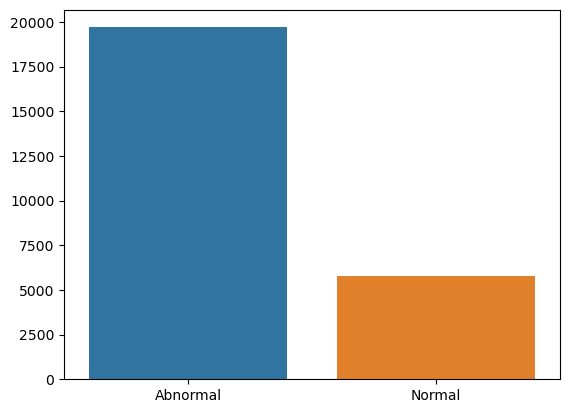

In [23]:
#visualising the output

sns.barplot(x=outputs.index, y=outputs.values)
plt.show()

In [24]:
df['Heart_rate_bpm']

0         94.0
1         94.0
2        101.0
3         55.0
4         93.0
         ...  
25488     56.0
25489     94.0
25490     94.0
25491     93.0
25492    102.0
Name: Heart_rate_bpm, Length: 25493, dtype: float64

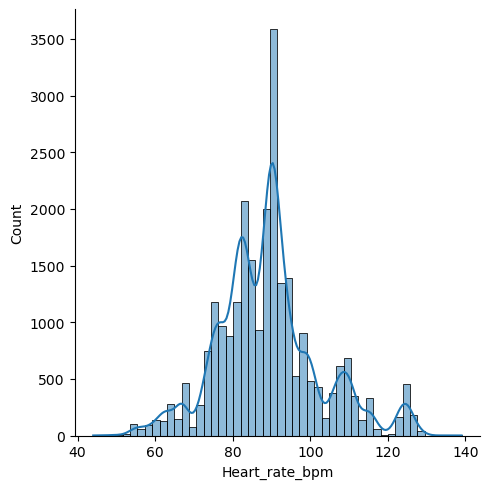

In [25]:
sns.displot(data=df,x="Heart_rate_bpm",kde=True,bins=50)

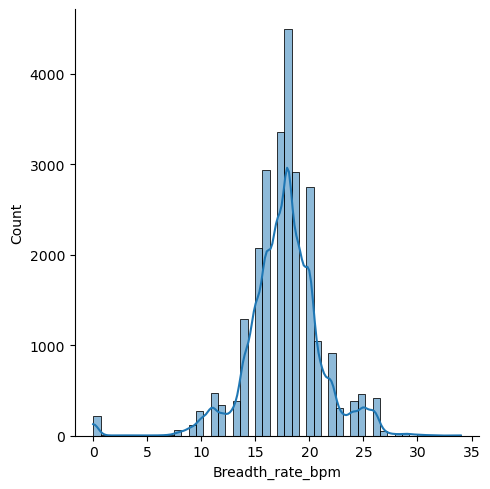

In [26]:
sns.displot(data=df,x="Breadth_rate_bpm", kde =True, bins=50)

we can observe a gaussian ditribution for this data in both heart rate and breadth rate as suugested by the distplots

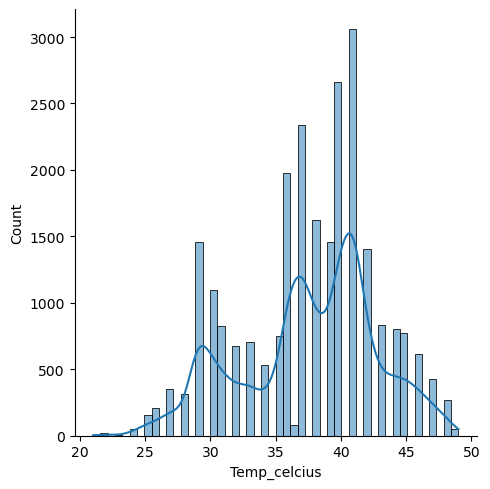

In [27]:
sns.displot(data=df,x="Temp_celcius", kde =True, bins=50)

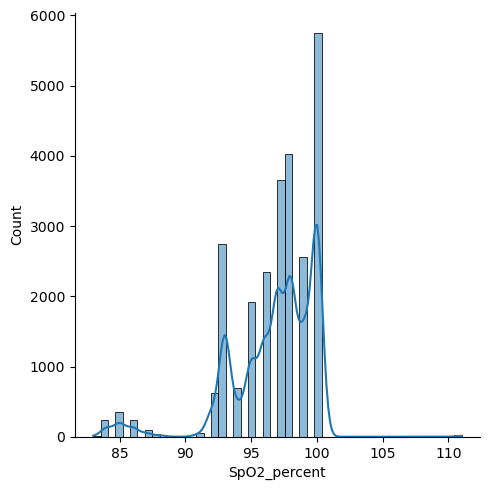

In [28]:
sns.displot(data=df,x="SpO2_percent", kde =True, bins=50)

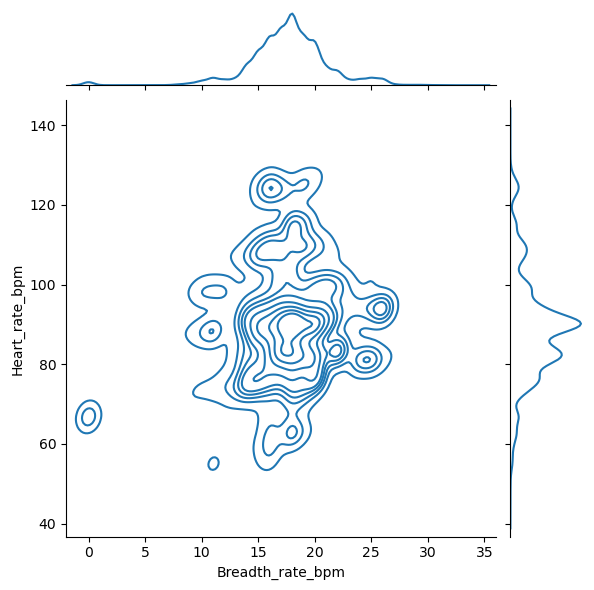

In [29]:
sns.jointplot(y='Heart_rate_bpm',x='Breadth_rate_bpm',data=df,kind='kde')

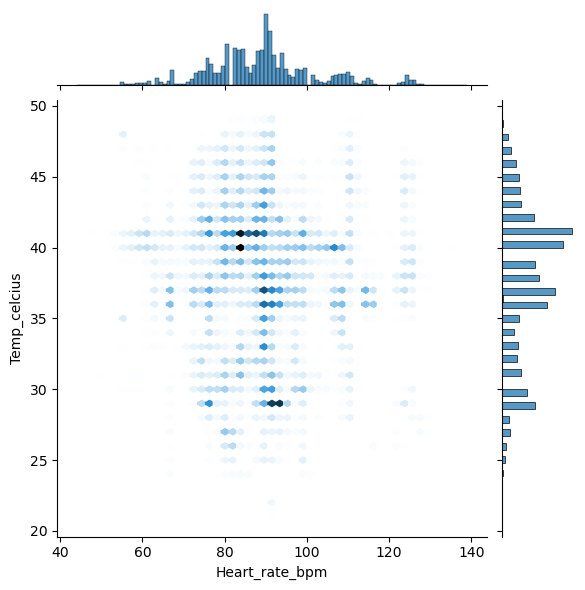

In [30]:
sns.jointplot(x='Heart_rate_bpm',y='Temp_celcius',data=df,kind='hex')

<Axes: xlabel='Heart_rate_bpm'>

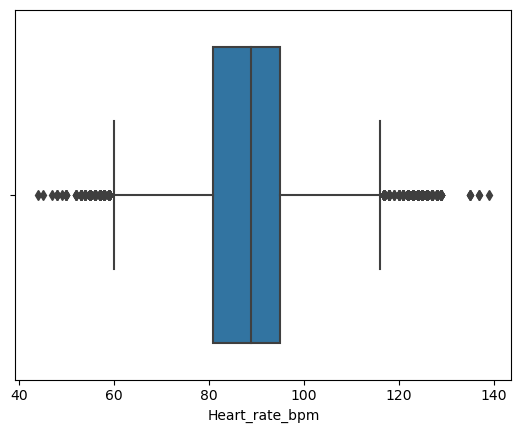

In [31]:
sns.boxplot(data=df, x='Heart_rate_bpm', orient='h')
# we can observe that the data is not highly distribued around the mean and a slight negative skew is also observed

<Axes: xlabel='Breadth_rate_bpm'>

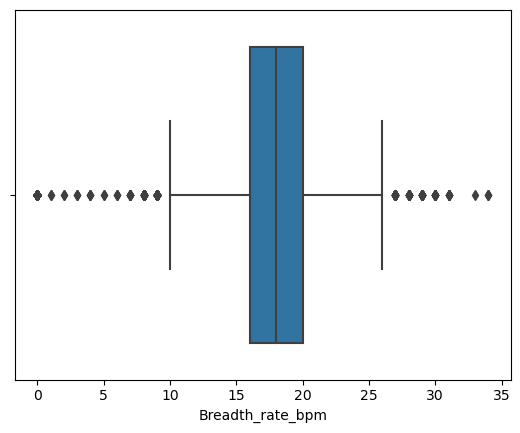

In [32]:
sns.boxplot(data=df, x='Breadth_rate_bpm', orient='h')
#Overall, the box plot suggests that a healthy breath rate is around 14 BPM, 
#with most people having breath rates between 11 and 17 BPM. 
#However, there is a wide range of normal breath rates,
#and people with breath rates outside of this range should not necessarily be concerned.

<Axes: xlabel='SpO2_percent'>

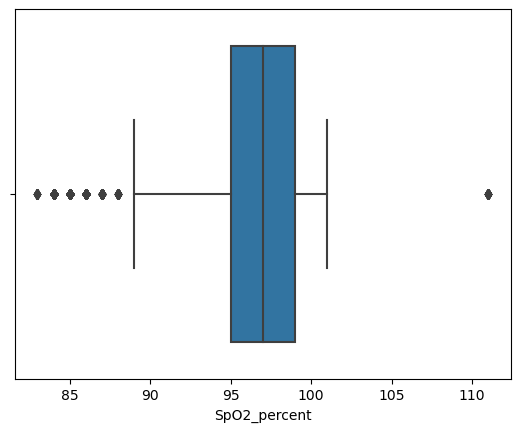

In [33]:
sns.boxplot(data=df, x='SpO2_percent', orient='h')


<Axes: xlabel='Temp_celcius'>

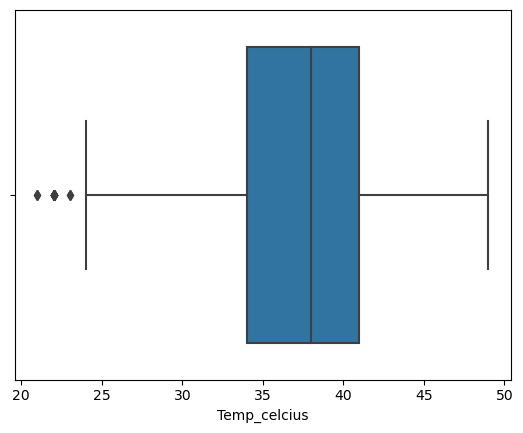

In [34]:
sns.boxplot(data=df, x='Temp_celcius', orient='h')
#slight negative skew

C:\Users\yashv\AppData\Local\Temp\ipykernel_26852\2502643050.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  relation = df.corr()


<Axes: >

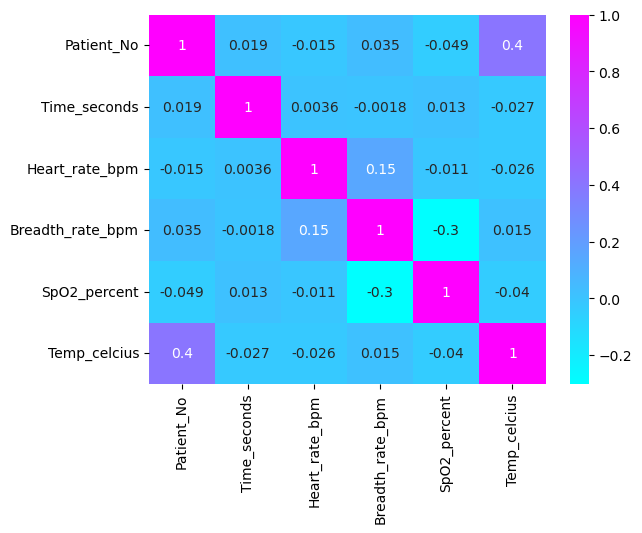

In [4]:
relation = df.corr()
sns.heatmap(relation,annot=True,cmap='cool')

from this we can observe clear negative co-relation b/w SPo2 and Breadth_rate_levels

a slight positive co-relation is also observed b/w breadth_rate and heart_rate

In [7]:
from sklearn.impute import SimpleImputer

# Create a SimpleImputer instance with the strategy set to 'mean'
imputer = SimpleImputer(strategy='mean')

# Create a copy of your DataFrame without the "Output" column
X = df.drop(["Output"], axis=1)

# Fit the imputer on your dataset
imputer.fit(X)

# Transform your dataset by replacing missing values with the mean
X_imputed = imputer.transform(X)


In [3]:
df
X=df.drop(["Output"],axis =1)

In [4]:
y=df['Output']

In [5]:
X

Patient_No  Time_seconds  Heart_rate_bpm  Breadth_rate_bpm  \
0               1             0            94.0              21.0   
1               2             1            94.0              25.0   
2               3             2           101.0              25.0   
3               4             3            55.0              11.0   
4               5             4            93.0              26.0   
...           ...           ...             ...               ...   
25488       25489           476            56.0              12.0   
25489       25490           477            94.0              25.0   
25490       25491           478            94.0              21.0   
25491       25492           479            93.0              27.0   
25492       25493           480           102.0              25.0   

       SpO2_percent  Temp_celcius  
0              97.0          36.2  
1              97.0          36.2  
2              93.0          38.0  
3             100.0          35.0  
4              95.0          37.0  
...             ...           ...  
25488         101.0          33.0  
25489          98.0          36.4  
25490          97.0          36.2  
25491          95.0          37.0  
25492          92.0          37.0  

[25493 rows x 6 columns]

In [8]:
X_new=pd.DataFrame(imputer.fit_transform(X))

In [9]:
X_new.columns = ['Patient_No', 'Time_seconds', 'Heart_rate_bpm', 'Breadth_rate_bpm',
       'SpO2_percent', 'Temp_celcius']

In [10]:
X_new.head()

Patient_No  Time_seconds  Heart_rate_bpm  Breadth_rate_bpm  SpO2_percent  \
0         1.0           0.0            94.0              21.0          97.0   
1         2.0           1.0            94.0              25.0          97.0   
2         3.0           2.0           101.0              25.0          93.0   
3         4.0           3.0            55.0              11.0         100.0   
4         5.0           4.0            93.0              26.0          95.0   

   Temp_celcius  
0          36.2  
1          36.2  
2          38.0  
3          35.0  
4          37.0

In [43]:
X_new.isnull().sum()

Patient_No          0
Time_seconds        0
Heart_rate_bpm      0
Breadth_rate_bpm    0
SpO2_percent        0
Temp_celcius        0
dtype: int64

In [44]:
X_train,X_test,y_train,y_test=train_test_split(X_new,y,train_size=0.8,test_size=0.2,random_state=0)

In [45]:
X_train

Patient_No  Time_seconds  Heart_rate_bpm  Breadth_rate_bpm  \
11833     11834.0         289.0           125.0              16.0   
2610       2611.0         205.0            82.0              20.0   
2074       2075.0         150.0            98.0              10.0   
11720     11721.0         176.0           125.0              17.0   
23360     23361.0         272.0            84.0              16.0   
...           ...           ...             ...               ...   
13123     13124.0         136.0            82.0              17.0   
19648     19649.0         408.0            82.0              13.0   
9845       9846.0         225.0           122.0              16.0   
10799     10800.0         216.0            61.0              18.0   
2732       2733.0         327.0            90.0              20.0   

       SpO2_percent  Temp_celcius  
11833          98.0          43.0  
2610           99.0          41.0  
2074           99.0          34.0  
11720          98.0          40.0  
23360          85.0          41.0  
...             ...           ...  
13123         100.0          37.0  
19648         100.0          42.0  
9845          100.0          38.0  
10799          97.0          42.0  
2732           99.0          41.0  

[20394 rows x 6 columns]

In [46]:
X_test

Patient_No  Time_seconds  Heart_rate_bpm  Breadth_rate_bpm  \
16664     16665.0         310.0           101.0              17.0   
20423     20424.0         221.0            90.0              18.0   
14365     14366.0         416.0            89.0              19.0   
17881     17882.0          84.0            80.0              16.0   
8645       8646.0         468.0            90.0              18.0   
...           ...           ...             ...               ...   
5322       5323.0          31.0            92.0              18.0   
8757       8758.0          99.0            76.0              11.0   
15802     15803.0         410.0            82.0              20.0   
24812     24813.0         281.0           115.0              18.0   
17225     17226.0         390.0            76.0              17.0   

       SpO2_percent  Temp_celcius  
16664     97.000000          40.0  
20423     97.000000          47.0  
14365     96.000000          42.0  
17881     94.000000          45.0  
8645      98.000000          41.0  
...             ...           ...  
5322      96.000000          36.0  
8757      96.716471          40.0  
15802     93.000000          43.0  
24812     93.000000          37.0  
17225     98.000000          40.0  

[5099 rows x 6 columns]

In [47]:
model = RandomForestClassifier(n_estimators=500, max_depth=7)
model.fit(X_train,y_train)
result=model.predict(X_test)
score = accuracy_score(y_test,result)
print(f"Accuracy is: {score}")

Accuracy is: 0.9968621298293783


In [6]:
# install full version
!pip install pycaret[full]

^C


In [4]:
from pycaret.classification import *
clf1 = setup(data = X_new, target = "Output")
best = compare_models()

ModuleNotFoundError: No module named 'pycaret'

In [48]:
X_new.to_csv("updated_patient.csv")

  Obtaining dependency information for pycaret from https://files.pythonhosted.org/packages/d5/54/d575af389203fc27d6c6cf7d60c4e67fcabfda4bc8e84271c8a396bd4a03/pycaret-3.1.0-py3-none-any.whl.metadata
  Using cached pycaret-3.1.0-py3-none-any.whl.metadata (16 kB)
  Using cached numpy-1.23.5-cp311-cp311-win_amd64.whl (14.6 MB)
  Using cached scikit_learn-1.2.2-cp311-cp311-win_amd64.whl (8.3 MB)
  Using cached pyod-1.1.1.tar.gz (159 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Obtaining dependency information for category-encoders>=2.4.0 from https://files.pythonhosted.org/packages/1f/e2/495811f12b2e90753fff0e42a07adb0370a725de17cc23a579ac9d3ca67c/category_encoders-2.6.2-py2.py3-none-any.whl.metadata
  Using cached category_encoders-2.6.2-py2.py3-none-any.whl.metadata (8.0 kB)
  Obtaining dependency information for lightgbm>=3.0.0 from https://files.pythonhosted.org/packages/b3/f8/ee33e36194eb03a76eccf3adac3fba51f0e56fbd20609bb

  error: subprocess-exited-with-error
  
  pip subprocess to install build dependencies did not run successfully.
  exit code: 1
  
  [242 lines of output]
  Ignoring numpy: markers 'python_version == "3.7" and (platform_machine != "arm64" or platform_system != "Darwin") and platform_machine != "aarch64"' don't match your environment
  Ignoring numpy: markers 'python_version == "3.8" and (platform_machine != "arm64" or platform_system != "Darwin") and platform_machine != "aarch64"' don't match your environment
  Ignoring numpy: markers 'python_version == "3.7" and platform_machine == "aarch64"' don't match your environment
  Ignoring numpy: markers 'python_version == "3.8" and platform_machine == "aarch64"' don't match your environment
  Ignoring numpy: markers 'python_version == "3.8" and platform_machine == "arm64" and platform_system == "Darwin"' don't match your environment
  Ignoring numpy: markers 'python_version == "3.9" and platform_machine == "arm64" and platform_system == "Da

In [17]:
frame = [X,y]
df_new= pd.concat(frame,axis =1)

In [18]:
df_new.isna().sum()

Patient_No            0
Time_seconds          0
Heart_rate_bpm        5
Breadth_rate_bpm    147
SpO2_percent        127
Temp_celcius          0
Output                0
dtype: int64

In [19]:
df

Patient_No  Time_seconds  Heart_rate_bpm  Breadth_rate_bpm  \
0               1             0            94.0              21.0   
1               2             1            94.0              25.0   
2               3             2           101.0              25.0   
3               4             3            55.0              11.0   
4               5             4            93.0              26.0   
...           ...           ...             ...               ...   
25488       25489           476            56.0              12.0   
25489       25490           477            94.0              25.0   
25490       25491           478            94.0              21.0   
25491       25492           479            93.0              27.0   
25492       25493           480           102.0              25.0   

       SpO2_percent  Temp_celcius    Output  
0              97.0          36.2    Normal  
1              97.0          36.2    Normal  
2              93.0          38.0  Abnormal  
3             100.0          35.0  Abnormal  
4              95.0          37.0    Normal  
...             ...           ...       ...  
25488         101.0          33.0  Abnormal  
25489          98.0          36.4    Normal  
25490          97.0          36.2    Normal  
25491          95.0          37.0    Normal  
25492          92.0          37.0  Abnormal  

[25493 rows x 7 columns]